# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [52]:
import pandas as pd
import numpy as np
import time

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
missing_vals = df.isna().sum()
print("Missing values per column:\n", missing_vals)

Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Goal is to compare the performance of the classifiers encountered, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. A dataset related to marketing bank products over the telephone will be used..

In [29]:
df_add = pd.read_csv('data/bank-additional/bank-additional.csv', sep = ';')
num_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'] 
categorical_cols = [ 'job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'] # Replace with your column names
all_cols = ['age','job', 'marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','poutcome','y'] 
y = pd.DataFrame(df_add['y'])
df_add[num_cols] = df_add[num_cols].apply(pd.to_numeric,errors='coerce')

df_add.info()
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [61]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
le = LabelEncoder()
enc = ce.CatBoostEncoder(cols=categorical_cols)
print(enc)

CatBoostEncoder(cols=['job', 'marital', 'education', 'default', 'housing',
                      'loan', 'contact', 'month', 'day_of_week', 'poutcome',
                      'y'])


## Encoding Categorical and Numeric values to be numeric for Models to accept clean data.

In [30]:
print(df_add.shape)
print(y.shape)
df_add[categorical_cols] = enc.fit_transform(df_add[categorical_cols],y)

#df_add_enc[categorical_cols] = df_add_enc[categorical_cols].apply(pd.to_numeric,errors='coerce')
print(df_add)


(4119, 21)
(4119, 1)
      age       job   marital  education   default   housing      loan  \
0      30  0.109493  0.109493   0.109493  0.109493  0.109493  0.109493   
1      39  0.109493  0.109493   0.109493  0.054746  0.109493  0.054746   
2      25  0.054746  0.054746   0.054746  0.036498  0.054746  0.036498   
3      38  0.036498  0.036498   0.054746  0.027373  0.109493  0.109493   
4      47  0.109493  0.027373   0.109493  0.021899  0.036498  0.027373   
...   ...       ...       ...        ...       ...       ...       ...   
4114   30  0.131792  0.100562   0.075042  0.121447  0.110497  0.102420   
4115   39  0.131661  0.100522   0.105784  0.121410  0.110446  0.111808   
4116   27  0.233043  0.134644   0.105669  0.121373  0.109962  0.111775   
4117   58  0.131531  0.100482   0.105554  0.121337  0.109902  0.111741   
4118   34  0.092931  0.134527   0.105439  0.121300  0.110395  0.111708   

       contact     month  day_of_week  ...  campaign  pdays  previous  \
0     0.109493  0

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

### Splitting training for Decision Tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_add, y, test_size=0.2, random_state=42)
y_train.head()

,y
324,no
2350,no
1391,no
468,no
561,no


In [ ]:
### Splitting and training same data for LogistiRegression

In [32]:
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(df_add, y, test_size=0.2, random_state=42)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [55]:
st_dtc = time.time()
cls =tree.DecisionTreeClassifier(max_depth=3, random_state=42)
cls.fit(X_train,y_train)
end_dtc = time.time()
dtc_train_time = end_dtc - st_dtc
print(dtc_train_time)

0.030918598175048828


In [67]:
y_train_pred = cls.predict(X_train)
y_test_pred = cls.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 1.0000


[Text(0.4, 0.875, 'x[20] <= 0.082\ngini = 0.194\nsamples = 3295\nvalue = [2936, 359]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 2935\nvalue = [2935, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[20] <= 0.332\ngini = 0.006\nsamples = 360\nvalue = [1, 359]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[11] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 358\nvalue = [0, 358]')]

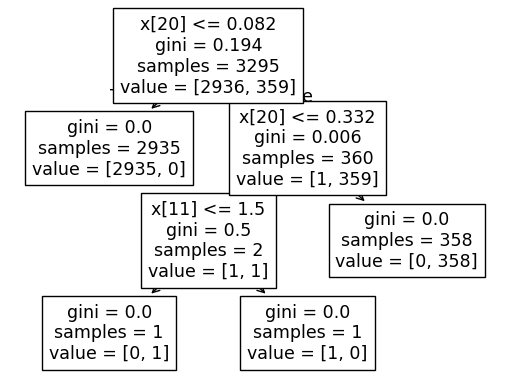

In [34]:
tree.plot_tree(cls)

In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

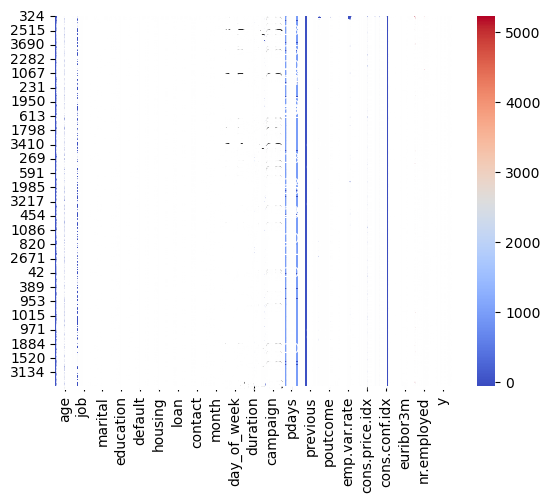

In [37]:
sns.heatmap(X_train, cmap="coolwarm", annot=True, annot_kws=None, cbar_ax=None, square=False, xticklabels='auto')

# Show the plot
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [38]:
from sklearn.linear_model import LogisticRegression

In [71]:
st_lrg = time.time()
model_rg = LogisticRegression(max_iter=5000)
model_rg.fit(X_train_rg, y_train_rg)
end_lrg = time.time()
lrg_train_time = end_dtc - st_dtc
print(lrg_train_time)

0.030918598175048828


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
y_train_pred_rg = model_rg.predict(X_train_rg)

train_accuracy_rg = accuracy_score(y_train_rg, y_train_pred_rg)

print(f"Training Accuracy: {train_accuracy_rg:.4f}")

model_rg.fit(X_test_rg, y_test_rg)
y_test_pred_rg = model_rg.predict(X_test_rg)
test_accuracy_rg = accuracy_score(y_test_rg, y_test_pred_rg)


print(f"Testing Accuracy: {test_accuracy_rg:.4f}")

Training Accuracy: 0.8914


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.9988


In [44]:
#hours_studied = np.array([3.25]).reshape(-1, 11)
probability_of_pass = model_rg.predict_proba(X_train_rg)

print(f"Probability of failing/passing: {probability_of_pass}")

Probability of failing/passing: [[0.99762372 0.00237628]
 [0.99822822 0.00177178]
 [0.99460749 0.00539251]
 ...
 [0.99873752 0.00126248]
 [0.99335482 0.00664518]
 [0.99349856 0.00650144]]


### Y Axis
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
### Axis
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


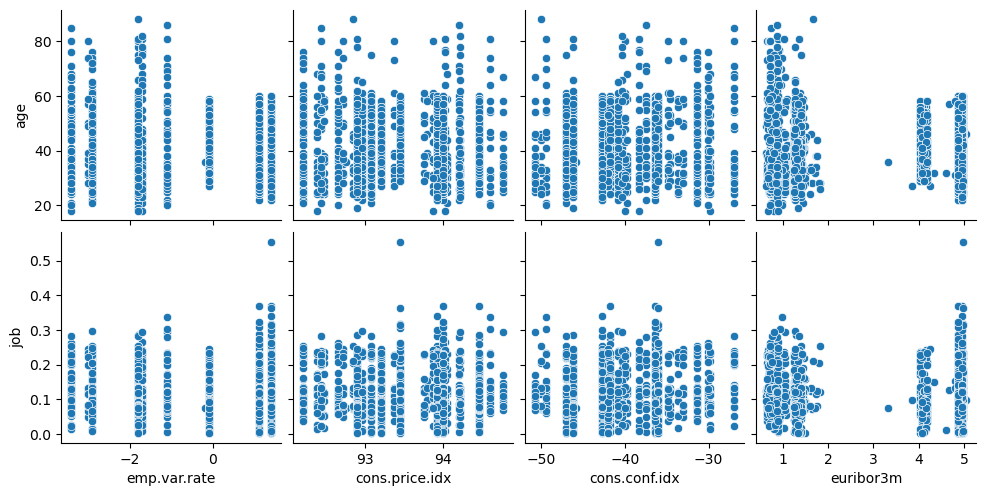

In [45]:

print(X_train_rg.columns)
X_train_rg= X_train_rg[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','age','job']]
print(X_train.columns)
sel_x_vars = ["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m"]
sel_y_vars = ["age","job"]
sns.pairplot(X_train_rg, kind='scatter', x_vars=sel_x_vars, y_vars= sel_y_vars)

# Show the plot
plt.show()

### Problem 9: Score the Model

What is the accuracy of your model?

### Predicting Using the DeisionTreeClassifier

In [46]:
pred_cls = cls.fit(X_test,y_test)
cls.apply(X_test)


array([2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
node_indctr = cls.decision_path(X_test)
print(node_indctr)

  (0, 0)	1
  (0, 2)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 2)	1
  (5, 0)	1
  (5, 1)	1
  (6, 0)	1
  (6, 2)	1
  (7, 0)	1
  (7, 1)	1
  (8, 0)	1
  (8, 1)	1
  (9, 0)	1
  (9, 1)	1
  (10, 0)	1
  (10, 1)	1
  (11, 0)	1
  (11, 1)	1
  (12, 0)	1
  :	:
  (811, 1)	1
  (812, 0)	1
  (812, 1)	1
  (813, 0)	1
  (813, 1)	1
  (814, 0)	1
  (814, 2)	1
  (815, 0)	1
  (815, 1)	1
  (816, 0)	1
  (816, 1)	1
  (817, 0)	1
  (817, 1)	1
  (818, 0)	1
  (818, 1)	1
  (819, 0)	1
  (819, 2)	1
  (820, 0)	1
  (820, 1)	1
  (821, 0)	1
  (821, 1)	1
  (822, 0)	1
  (822, 1)	1
  (823, 0)	1
  (823, 1)	1


In [48]:
sid = 0
node_indxs = node_indctr.indices[node_indctr.indptr[sid]:
                                      node_indctr.indptr[sid + 1]]

print(f"Nodes visited by sample {sid}: {node_indxs}")

Nodes visited by sample 0: [0 2]


In [49]:
print(cls.score(X_test,y_test))

1.0


In [ ]:
### Predicting Using the LogisticRegression

In [51]:
model_rg.predict(X_test_rg)
model_rg.score(X_test,y_test_rg)

1.0

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [66]:
from sklearn.neighbors import KNeighborsClassifier
st_knc_time =  time.time()
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)    
end_knc_time =  time.time()
time_mnc = end_knc_time - end_knc_time
print(time_mnc)
predicted = knc.predict(X_test)

0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [76]:
y_train_pred_knc = knc.predict(X_train)

train_accuracy_knc = accuracy_score(y_train, y_train_pred_knc)

print(f"Training Accuracy: {train_accuracy_knc:.4f}")

knc.fit(X_test, y_test)
y_test_pred_knc = knc.predict(X_test)
test_accuracy_knc = accuracy_score(y_test, y_test_pred_knc)


print(f"Testing Accuracy: {test_accuracy_knc:.4f}")

Training Accuracy: 0.8932
Testing Accuracy: 0.9308


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
from sklearn.svm import SVC # Support Vector Classifier
st_svc_time = time.time()
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train) 
end_svc_time = time.time()
time_svc_train = end_svc_time - st_svc_time
print(time_svc_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2828502655029297


In [80]:
y_train_pred_svm = svm_model.predict(X_train)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

print(f"Training Accuracy: {train_accuracy_svm:.4f}")

knc.fit(X_test, y_test)
y_test_pred_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)


print(f"Testing Accuracy: {test_accuracy_svm:.4f}")

Training Accuracy: 0.9011
Testing Accuracy: 0.8993


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 DecisionTreeClassifier, 0.0309,1.0,1.0
 LogisticRegression, 0.0229,0.8914,0.9988
 KNeighbors, 0.0,0.8932,0.9308
 SVM, 0.28285,0.9011,0.8993

In [14]:
Cols = ['Model','Train Time','Train Accuracy','Test Accuracy']

In [15]:
Comp_df = pd.DataFrame(Cols)

In [17]:
Comp_df

,0
0,Model
1,Train Time
2,Train Accuracy
3,Test Accuracy


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Improving the DecisionTreeClssifier with DecisionTreeRegressor to predit better results with different Max_depths

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

##### Questions